<a href="https://colab.research.google.com/github/manaswinivedula/pythonDeepLearningLab2/blob/master/7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/22
60000/60000 [==============================] - 4s 63us/step - loss: 0.6062 - acc: 0.5685 - val_loss: 0.3058 - val_acc: 0.7917
Epoch 2/22
60000/60000 [==============================] - 3s 58us/step - loss: 0.2873 - acc: 0.7945 - val_loss: 0.2808 - val_acc: 0.7936
Epoch 3/22
60000/60000 [==============================] - 4s 60us/step - loss: 0.2790 - acc: 0.7946 - val_loss: 0.2763 - val_acc: 0.7917
Epoch 4/22
60000/60000 [==============================] - 4s 61us/step - loss: 0.2756 - acc: 0.7946 - val_loss: 0.2738 - val_acc: 0.7935
Epoch 5/22
60000/60000 [==============================] - 4s 61us/step - loss: 0.2732 - acc: 0.7949 - val_loss: 0.2717 - val_acc: 0.7940
Epoch 6/22
60000/60000 [==============================] - 4s 61us/step - loss: 0.2710 - acc: 0.7955 - val_loss: 0.2694 - val_acc: 0.7958
Epoch 7/22
60000/60000 [==============================] - 4s 60us/step - loss: 0.2685 - acc: 0.7963 - val_loss: 0.2664 - val_acc

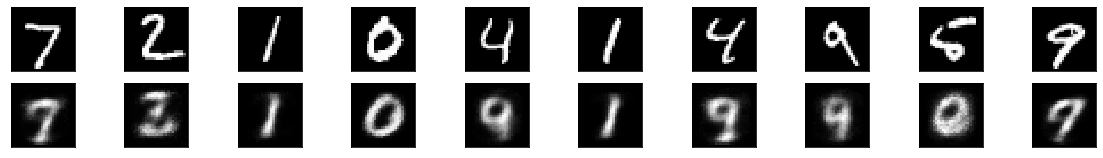

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from keras import regularizers

# number of neurons in the encoded layer
encoding_dimensions = 32  

# Input placeholder
input_image = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(128, activation='relu')(encoded)

# encoded representation of the input
encoded = Dense(encoding_dimensions, activation='relu', activity_regularizer=regularizers.l1(1e-7))(encoded)

# decoded is the reconstructed representation of an input
decoded = Dense(784, activation='sigmoid')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

# Model that maps an input to its reconstructed (decoded) representation
autoencoder = Model(input_image, decoded)

# Model that maps an input to its encoded representation
encoder = Model(input_image, encoded)

# Creating a placeholder for an encoded input which has 32 dimensions
encoded_input = Input(shape=(encoding_dimensions,))

# Loading the last layer of autoencoder
decoder_layer = autoencoder.layers[-1]

# Creating Decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Loading dataset

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize data to be in range  0 to 1

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
tensorboard = TensorBoard(log_dir='1', histogram_freq=0, write_graph=True, write_images=False)
history=autoencoder.fit(x_train, x_train, epochs=22, batch_size=1024, shuffle=True, validation_data=(x_test, x_test),callbacks=[tensorboard])

# Encoding data present in X_test tp predict reconstructed data
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

import matplotlib.pyplot as plt
 # Displaying 10 digits

n = 10 
plt.figure(figsize=(20, 4))

for i in range(n):
    # Displaying original digits
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Displaying Reconstructed digits
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

# Saving the model
model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Saving weights
autoencoder.save_weights("model.h5")



